<a href="https://colab.research.google.com/github/oxfordfictionary/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use a 'magic' symbol (%) to sppecify non-python code for underlying jupyter 
#notebook
%matplotlib inline

#I'm copy and pasting this explanation before because it is helpful for me
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
#to see what possible plot styles there are use plt.style.available
#per lecture, we are using "fast"
plt.style.use('fast')

In [0]:
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [0]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


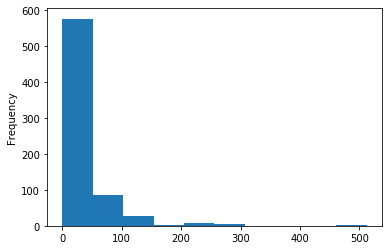

In [0]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

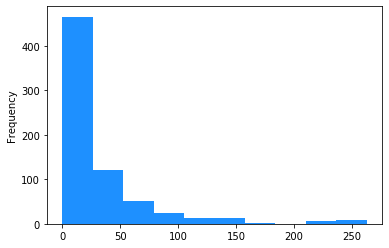

In [0]:
# Remove two extreme outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [0]:
#pd.cut is turning continuous variable into a categorical variable
# A continuous variable can be converted to a categorical var using binning.
farebins=[0, 8, 15, 33, 512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
# Save as "myresults"
myresults = df['fare_groups'].value_counts().sort_index()

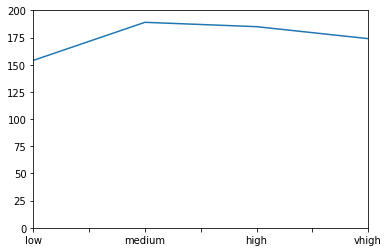

In [0]:
# specify range of y-axis to get more accurate results
#lim = limits
myresults.plot(ylim=(0,200));

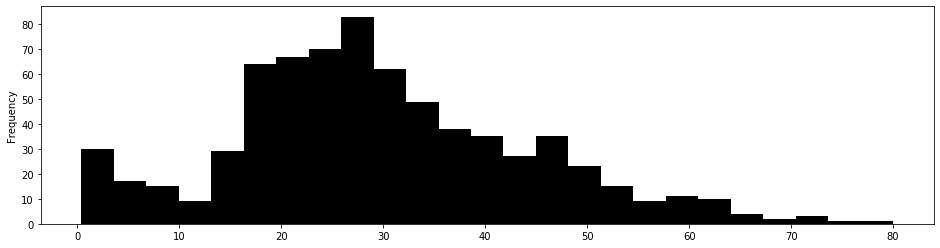

In [0]:
#Histogram for single continuous variable 
#default bins are 10
#Again, semicolon silences the object text above the plot
#figsize-- determines visual size of graph in cm(?)
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='black');
# you can also do df[Age].hist() BUT the more universal code is the one above

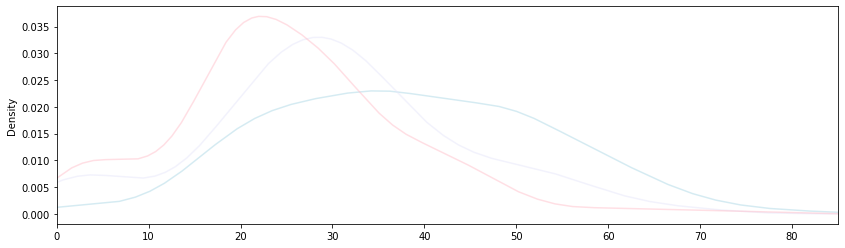

In [0]:
#Stacked histogram of continuous variable, broken down by categorical variable
#xlim controls for mistake age entries by limiting the x points-- ex: ages that 
#are negative numbers or over 100
#alpha is for transparency
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), alpha=0.5, color='lightblue');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), alpha=0.5, color='lavender');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), alpha=0.5, color='pink');


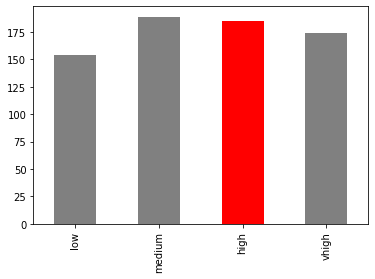

In [0]:
#bar chart, use colors
df['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['gray','gray', 'red', 'gray'])

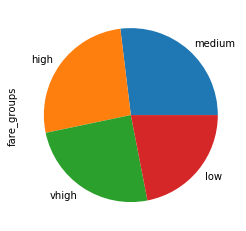

In [0]:
#pie chart
df['fare_groups'].value_counts().plot(kind='pie');

In [0]:
#Compare two categorical variables with crosstabs
cabsurvive = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns');

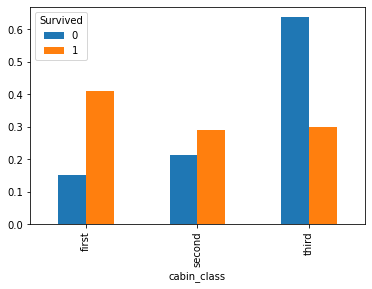

In [0]:
#make a bar chart
cabsurvive.plot(kind='bar');

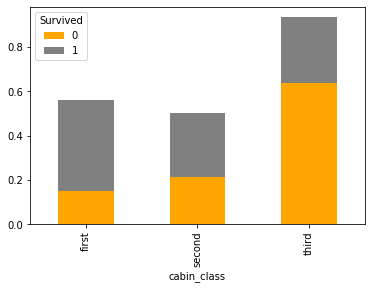

In [0]:
#stacked bar chart, good way to compare percentages
cabsurvive.plot(kind='bar', stacked=True, color=['orange', 'gray']);

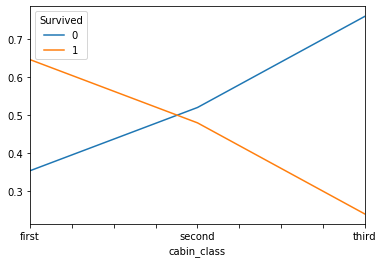

In [0]:
cabsurvive2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cabsurvive2.plot()

In [0]:
#Single continuous variable
df['Age'].mean()

29.618011283497882

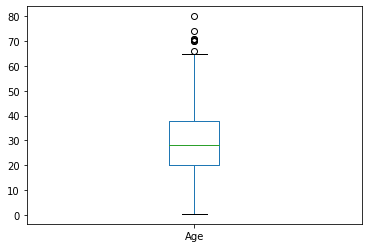

In [0]:
# box plot
df['Age'].plot(kind='box')

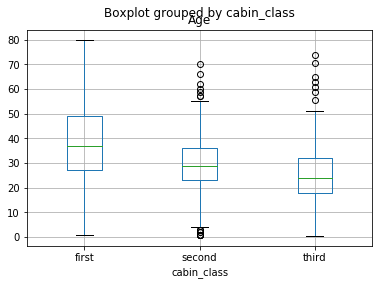

In [0]:
#comparing continuous by categorical
df.boxplot(column="Age", by='cabin_class');

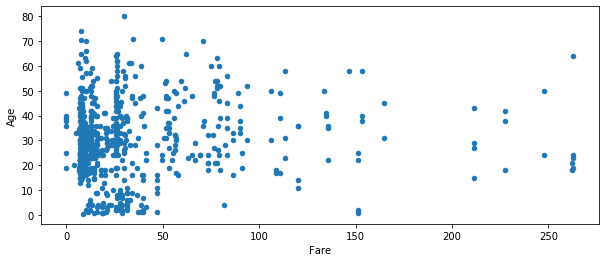

In [0]:
#now explore continuous variables
df.plot(kind='scatter', x='Fare', y='Age', figsize=(10,4));

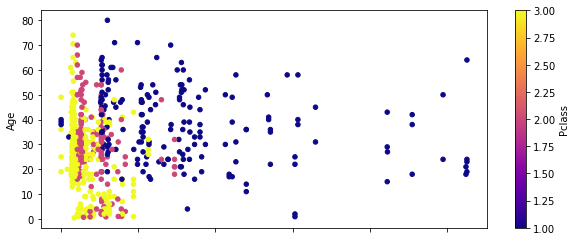

In [0]:
#now with 3 continuous variables, x y and z axis (represented by "c")
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(10,4));

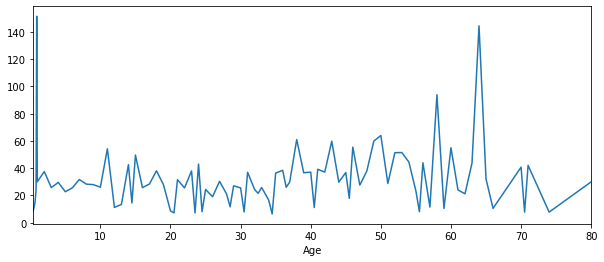

In [0]:
#line chart: age by fare IN PANDAS
df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4));

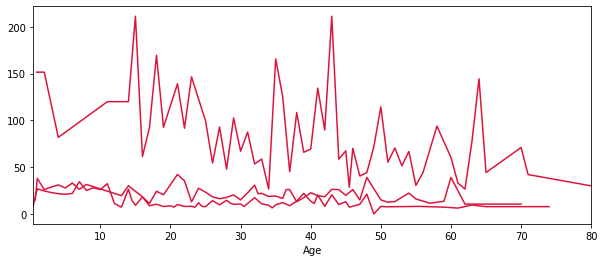

In [0]:
#Line chart: age by fare and cabin class
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) 
# you can just loop through the values.
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10,4), color=mycolors)

In [0]:
#correlation matrix
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.356462,-0.082446,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.552893
Age,-0.082446,-0.365902,1.000000,0.093143
Fare,0.266100,-0.552893,0.093143,1.000000


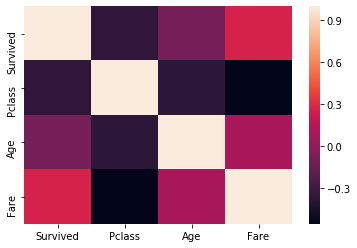

In [0]:
#seaborn
import seaborn as sns
sns.heatmap(corr_matrix);

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x **2
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

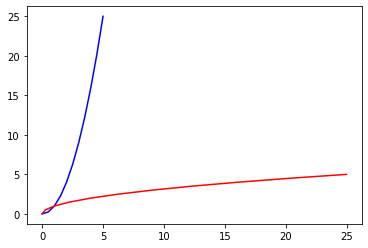

In [0]:
# You can have two 'plt' plots together
plt.plot(x,y, 'b')
plt.plot(y, x, 'r');

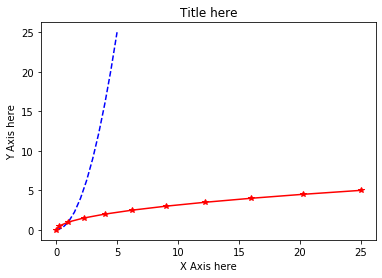

In [0]:
# add lavels, plus texture
plt.plot(x, y, 'b--')
plt.plot(y, x, 'r*-')
plt.xlabel('X Axis here')
plt.ylabel('Y Axis here')
plt.title('Title here');

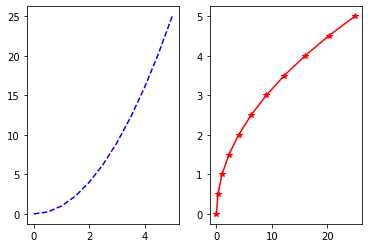

In [0]:
#basic sytax goes like this: plt.subplot(nrows, ncols, plot_numbers)
plt.subplot(1,2,1)
plt.plot(x, y, 'b--')

plt.subplot(1,2,2)
plt.plot(y, x, 'r*-');



Text(0.5, 1.0, 'my titl')

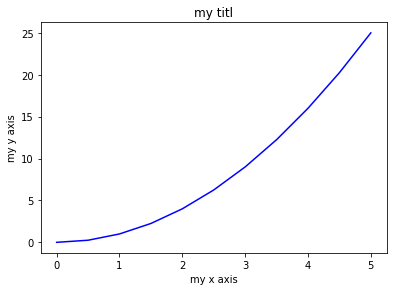

In [0]:
# Create Figure (empty canvas)
fig = plt.figure()
# Add set of axes to figure
# left, bottom, width, height (range 0 to 1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my titl')
# Notice the use of set_ to begin methods

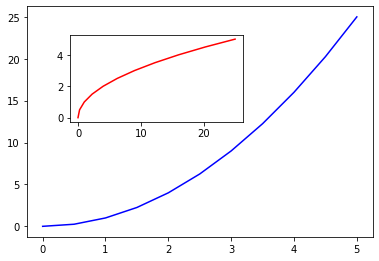

In [0]:
# Creates blank canvas
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]);
# Larger Figure Axes 1
axes1.plot(x,y,'b')
# Insert Figure Axes 2
axes2.plot(y,x,'r')

In [0]:
''' The subplots() method

The plt.subplots() object will act as a more automatic axis manager. It is somewhat more common than using .figure()

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:'''

In [0]:
''' fig, ax = plt.subplots() is more concise than
fig = plt.figure()
ax = fig.add_subplot(111)'''

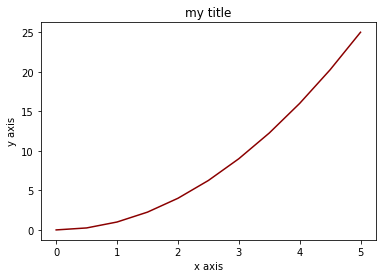

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=1)

#defaults is 1,2
#using axes to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('my title');

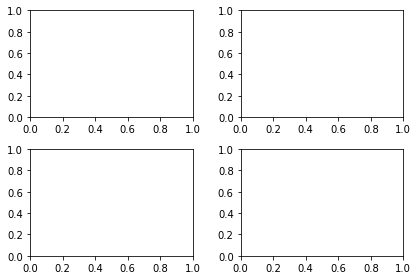

In [0]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)


# the parameter labels `nrows` and `ncols` are optional.
plt.tight_layout()
# more about `.tight_layout()` below.


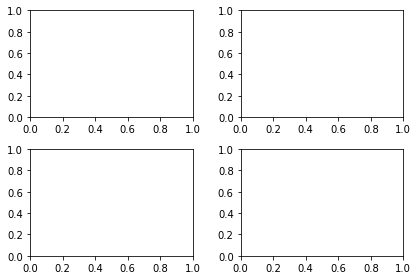

In [0]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

'''A common issue with matplolib is overlapping subplots or figures. We ca use fig.tight_layout() or plt.tight_layout() method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:'''
# the parameter labels `nrows` and `ncols` are optional.
plt.tight_layout()
# more about `.tight_layout()` below.

In [0]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e1dc40c18>,
      dtype=object)

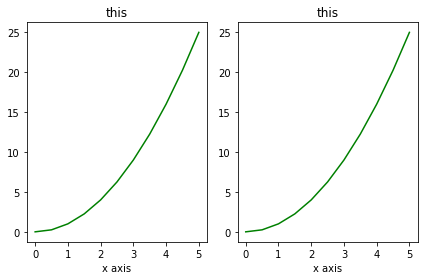

In [0]:

fig, axes = plt.subplots(nrows=1, ncols=2)


# Display the figure object 
for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('this')   ;
plt.tight_layout()

In [0]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

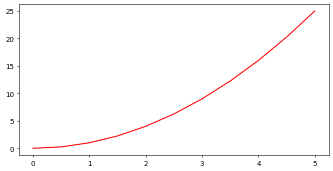

In [0]:
fig, axes = plt.subplots(figsize=(8,4), dpi=50)
axes.plot(x, y , 'r');

In [0]:
# saving a figure to a file
fig.savefig('filename.png')

In [0]:
#specifying dpi and format
fig.savefig('filename.png', dpi=200)

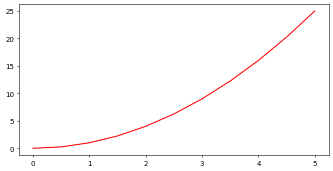

In [0]:
ax.set_title('my title')
fig

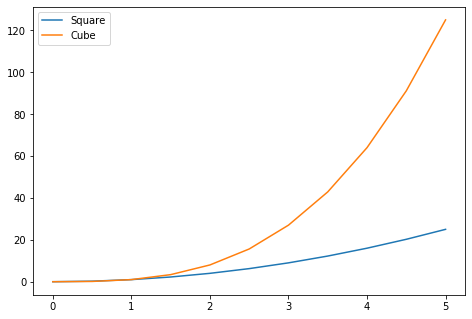

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label='Square')
ax.plot(x, x**3, label='Cube')
ax.legend();

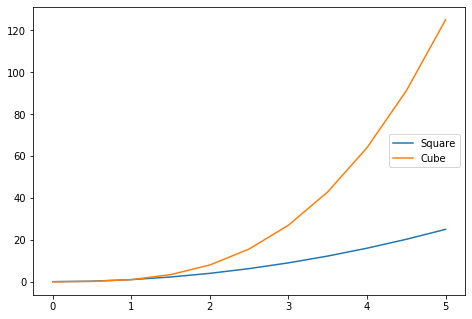

In [0]:
# Lots of options....
ax.legend(loc=1)
ax.legend(loc=5)
fig

# Try replacing the `loc` value with integers 1 through 10.
# let matplotlib decide the optimal location

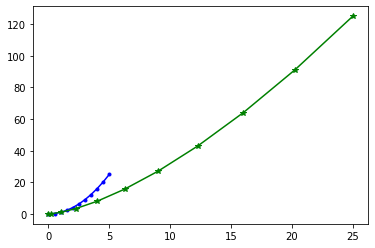

In [0]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
# blue line with dots
ax.plot(x, x**2, 'b.-')
# green dashed line
ax.plot(y, x**3, 'g-*')

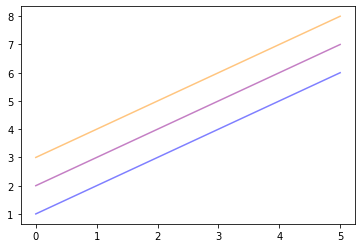

In [0]:
fig, ax = plt.subplots()
# half-transparant
ax.plot(x, x+1, color='blue', alpha=0.5)
# RGB hex code
ax.plot(x, x+2, color='#8B008B', alpha=0.5)
# RGB hex code 
ax.plot(x, x+3, color='#FF8C00', alpha=0.5);

In [0]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

In [0]:
# PLOT RANGE
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

In [0]:
# IMITATION FROM FIVETHIRTYEIGHT
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
#What styles are available?
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [0]:
#copy style
plt.style.use('fivethirtyeight')
#create fake list
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


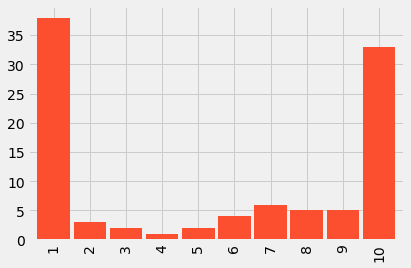

In [0]:
fake = pd.Series(fakelist, index=range(1,11))
fake.plot.bar (color='C1', width=0.9);

In [0]:
fake2 = pd.Series(fakelist2)

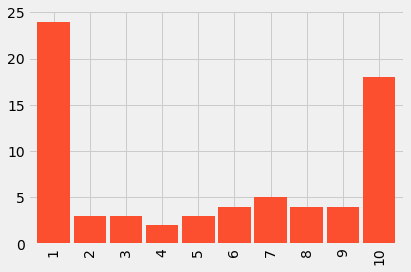

In [0]:
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
#x and y below affect where this text appears on screen
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)
df.head()

In [0]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']
#get demographic breakdowns for all IMDB users from lastday
lastday_filtered = lastday[lastday['category']=='IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

In [0]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
               final[pct_columns].T

In [0]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

In [0]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [7]:
#reading in csv
url = "https://raw.githubusercontent.com/oxfordfictionary/data/master/most-common-name/new-top-firstNames.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,name,newPerct2013
0,1,Michael,0.011577
1,2,James,0.010218
2,3,John,0.009675
3,4,Robert,0.009493
4,5,David,0.008943


In [0]:
df.drop(

In [0]:
# More Work Here